### Task 1

# Titanic Survival Prediction
### Project by - Lhingnunching Lhungdim

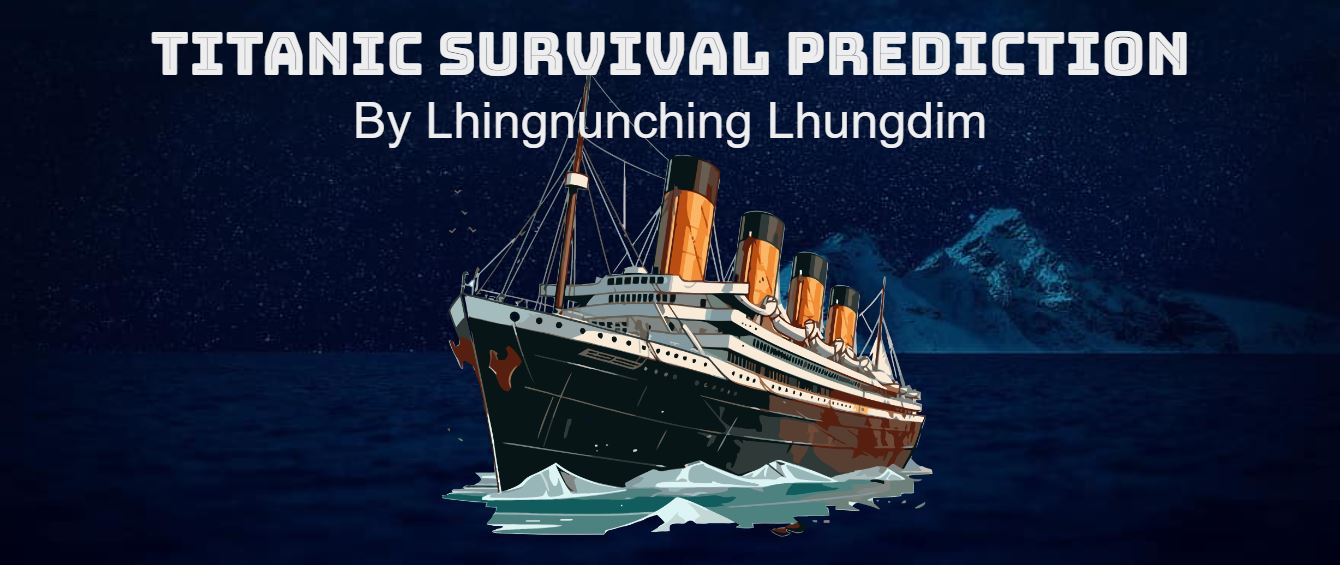
*All images are produced by the author

### Introduction

This is the first task of the CodSoft Data Science internship. <br>

Titanic Survival Prediction involves a compelling exploration using data analysis to delve into the tragic event of the RMS Titanic. This endeavor seeks to reveal the underlying factors influencing passenger survival during this historical maritime disaster. By scrutinizing a vast array of passenger details, encompassing factors like demographics, cabin class, and familial connections, we embark on a journey to unveil concealed trends and variables that determined survival outcomes. Through data examination and predictive modeling, our objective is to illuminate the human aspect of this tragic incident, drawing valuable insights from historical data.

The tasks at hand are as follows:
- Use the Titanic dataset to build a model that predicts whether a passenger on the Titanic survived or not.  
- The dataset typically used for this project contains information about individual passengers, such as their age, gender, ticket class, fare, cabin, and whether or not they survived.

The dataset was downloaded from Kaggle: https://www.kaggle.com/datasets/brendan45774/test-file/data 

### Importing Libraries and Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as mpl

import warnings
warnings.filterwarnings("ignore")

C:\Users\nunun\AppData\Roaming\Python\Python38\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


### I. Loading the Dataset

In [2]:
data = pd.read_csv('T1.csv')

### II. Exploratory Data Analysis 

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


#### Summary statistics of the dataset

In [4]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


#### Checking the data types of the attributes

In [5]:
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

#### Checking for attrbutes with Missing values

In [6]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

#### Correlation Analysis

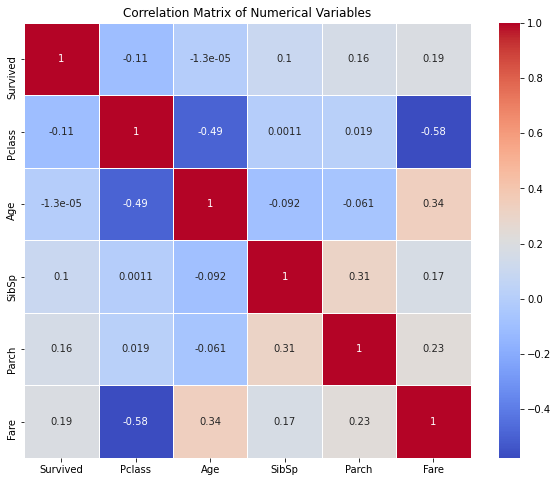

In [7]:
# Selecting the numerical columns 
numerical_columns = ['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

# Creating a correlation matrix
correlation_matrix = data[numerical_columns].corr()

# Creating a heatmap to visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Numerical Variables')
plt.show()


### Pre-processing the data

#### Missing value imputation


In [8]:
data["Age"] = data["Age"].fillna(data["Age"].median())
data["Fare"] = data["Fare"].fillna(data["Fare"].median())

In [9]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

In [10]:
emb = data.Embarked.unique()
for Embarked in emb:
    print("Embarked:", Embarked)

Embarked: Q
Embarked: S
Embarked: C


#### Feature Mapping

In [11]:
data['Embarked'] = data["Embarked"].map({'Q':0, 'S':1, 'C':2}).astype(int)
data["Embarked"].head(5)

0    0
1    1
2    0
3    1
4    1
Name: Embarked, dtype: int32

### III. Visualizing the Data

#### Numerical Attributes: Age, Fare, SibSp, Parch

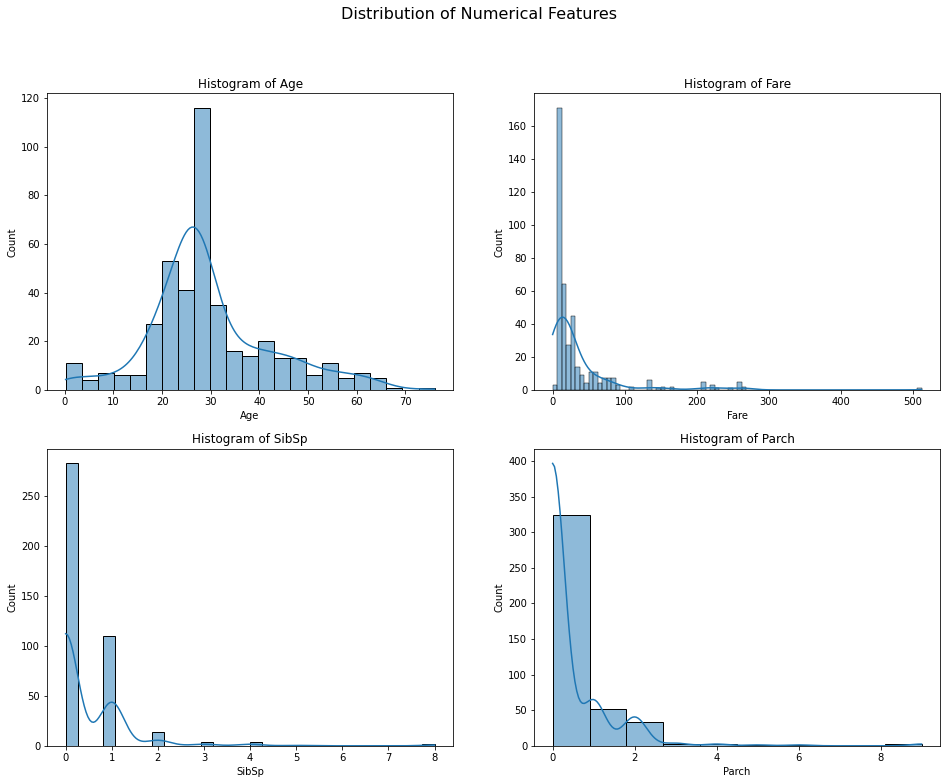

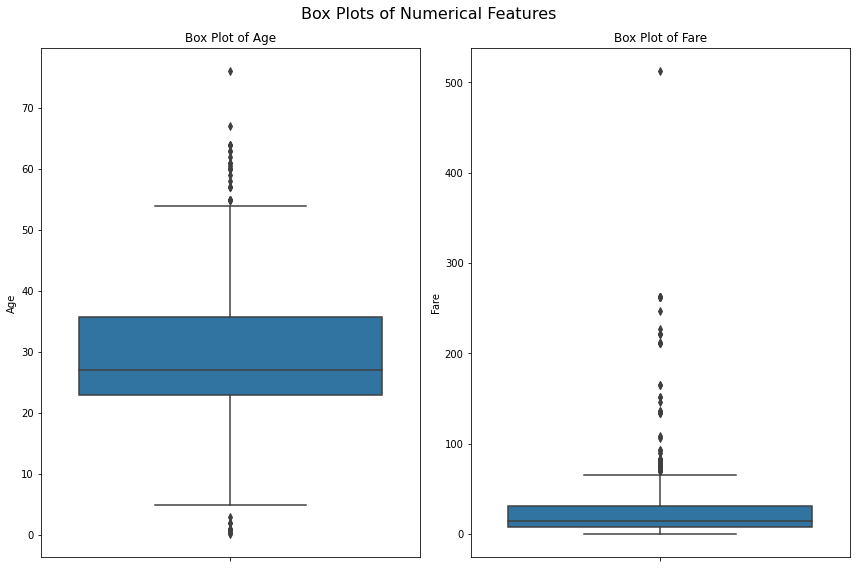

In [12]:
# Selecting the numerical columns
nc = ['Age', 'Fare', 'SibSp', 'Parch']

# Setting up subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 12))
fig.suptitle('Distribution of Numerical Features', fontsize=16)

# Creating histograms for numerical features
for i, column in enumerate(nc):
    row, col = i // 2, i % 2
    sns.histplot(data=data, x=column, kde=True, ax=axes[row, col])
    axes[row, col].set_title(f'Histogram of {column}')
    axes[row, col].set_xlabel(column)

# Creating box plots for numerical features
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 8))
fig.suptitle('Box Plots of Numerical Features', fontsize=16)

for i, column in enumerate(['Age', 'Fare']):
    sns.boxplot(data=data, y=column, ax=axes[i])
    axes[i].set_title(f'Box Plot of {column}')
    axes[i].set_ylabel(column)

plt.tight_layout()
plt.show()


#### Age Distribution: Using histograms and Kernel Density Estimation plots

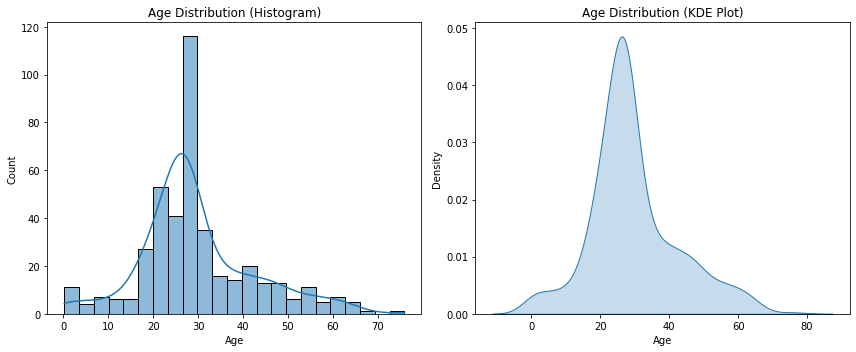

In [13]:
# Create a figure with two subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# Plot the histogram of ages
sns.histplot(data=data, x='Age', kde=True, ax=axes[0])
axes[0].set_title('Age Distribution (Histogram)')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Count')

# Plot the KDE plot of ages
sns.kdeplot(data=data, x='Age', fill=True, ax=axes[1])
axes[1].set_title('Age Distribution (KDE Plot)')
axes[1].set_xlabel('Age')
axes[1].set_ylabel('Density')

plt.tight_layout()
plt.show()


#### Categorical Variables: Pclass, Sex, Embarked

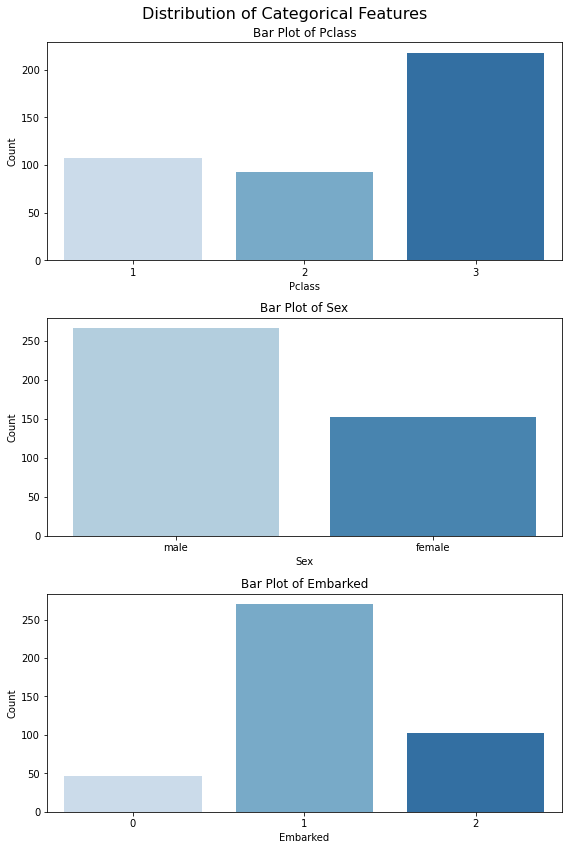

In [14]:
# Selecting the categorical columns
cc = ['Pclass', 'Sex', 'Embarked']

# Set up subplots
fig, axes = plt.subplots(nrows=len(cc), ncols=1, figsize=(8,12))
fig.suptitle('Distribution of Categorical Features', fontsize=16)

# Create bar plots for categorical features
for i, column in enumerate(cc):
    sns.countplot(data=data, x=column, ax=axes[i], palette='Blues')
    axes[i].set_title(f'Bar Plot of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Count')

plt.tight_layout()
plt.show()


#### Survived v/s other attributes

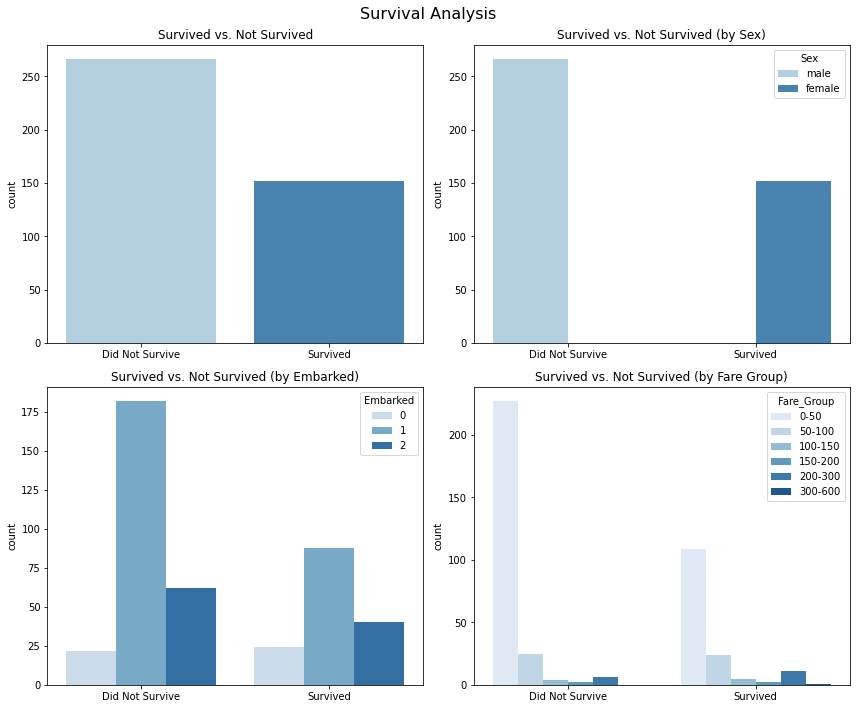

In [15]:
# Create a figure with multiple subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
fig.suptitle('Survival Analysis', fontsize=16)

# Bar plot to show the proportion of passengers who survived and those who did not
sns.countplot(data=data, x='Survived', ax=axes[0, 0], palette="Blues")
axes[0, 0].set_title('Survived vs. Not Survived')
axes[0, 0].set_xticklabels(['Did Not Survive', 'Survived'])
axes[0, 0].set_xlabel('')

# Bar plot to show the proportion of passengers who survived and those who did not with respect to sex
sns.countplot(data=data, x='Survived', hue='Sex', ax=axes[0, 1], palette="Blues")
axes[0, 1].set_title('Survived vs. Not Survived (by Sex)')
axes[0, 1].set_xticklabels(['Did Not Survive', 'Survived'])
axes[0, 1].set_xlabel('')

# Bar plot of survived with respect to embarked port
sns.countplot(data=data, x='Survived', hue='Embarked', ax=axes[1, 0], palette="Blues")
axes[1, 0].set_title('Survived vs. Not Survived (by Embarked)')
axes[1, 0].set_xticklabels(['Did Not Survive', 'Survived'])
axes[1, 0].set_xlabel('')

# Bar plot of survived with respect to fare (binning the fares)
fare_bins = [0, 50, 100, 150, 200, 300, 600]
labels = ['0-50', '50-100', '100-150', '150-200', '200-300', '300-600']
data['Fare_Group'] = pd.cut(data['Fare'], bins=fare_bins, labels=labels)
sns.countplot(data=data, x='Survived', hue='Fare_Group', ax=axes[1, 1], palette="Blues")
axes[1, 1].set_title('Survived vs. Not Survived (by Fare Group)')
axes[1, 1].set_xticklabels(['Did Not Survive', 'Survived'])
axes[1, 1].set_xlabel('')

plt.tight_layout()
plt.show()


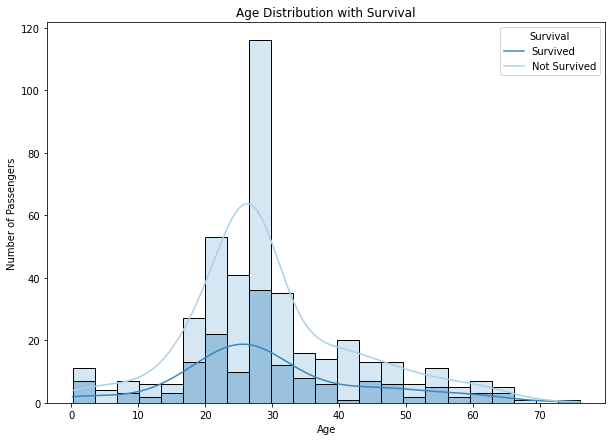

In [16]:
# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 7))

# Plot the histogram with stacked bars and KDE
sns.histplot(data=data, x="Age", hue="Survived", multiple="stack", kde=True, palette="Blues", ax=ax)

# Set title and labels
ax.set_title("Age Distribution with Survival")
ax.set_xlabel("Age")
ax.set_ylabel("Number of Passengers")

# Add a legend
ax.legend(title="Survival", labels=["Survived", "Not Survived"])

# Show the plot
plt.show()


#### Distribution of family sizes: SibSp + Parch

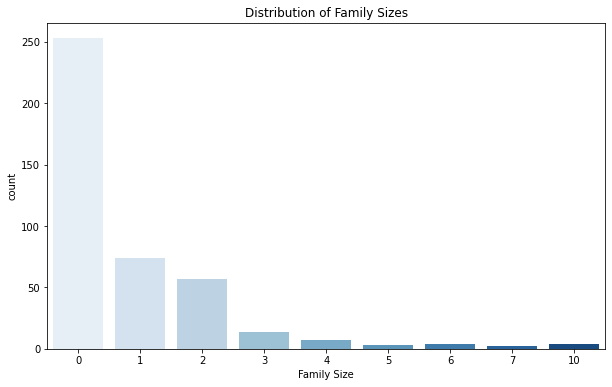

In [17]:
# Create a new column 'FamilySize' by adding 'SibSp' and 'Parch'
data['FamilySize'] = data['SibSp'] + data['Parch']

# Create a figure and a single subplot
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Distribution of Family Sizes')

# Bar plot to show the distribution of family sizes
sns.countplot(data=data, x='FamilySize', ax=ax, palette="Blues")
ax.set_xlabel('Family Size')

plt.show()


### IV. Predictive Analysis: Predicting Survival of the Passengers

#### A. Logistic Regression

In [18]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

#One hot encoding for Sex column
data['Sex'] = data['Sex'].map({'female': 0, 'male': 1})

#Feature Selection
X = data[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
y = data['Survived']


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a Logistic Regression model
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

# Make predictions
logistic_predictions = logistic_model.predict(X_test)


# Evaluate the Logistic Regression model
logistic_accuracy = accuracy_score(y_test, logistic_predictions)
print("Logistic Regression Accuracy:", logistic_accuracy)
print(classification_report(y_test, logistic_predictions))


Logistic Regression Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        34

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84



#### ROC curve  and Confusion Matrix for Logistic Regression

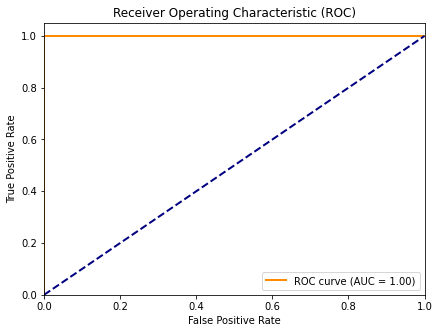

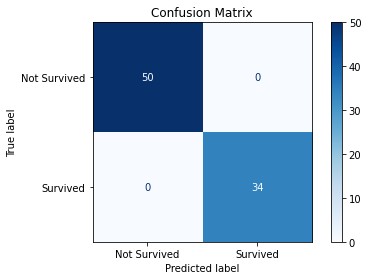

In [19]:
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, logistic_model.predict_proba(X_test)[:, 1])

# Calculate the AUC (Area Under the Curve) for the ROC curve
roc_auc = roc_auc_score(y_test, logistic_model.predict_proba(X_test)[:, 1])

# Create a confusion matrix
cm1 = confusion_matrix(y_test, logistic_predictions)

# Plot the ROC curve
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm1, display_labels=['Not Survived', 'Survived'])
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix')

plt.tight_layout()
plt.show()


#### B. Random Forest

In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Select features and target variable
X = data[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
y = data['Survived']

# Encode categorical variables (e.g., one-hot encoding for 'Sex' and 'Embarked')

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a Random Forest model
random_forest_model = RandomForestClassifier()
random_forest_model.fit(X_train, y_train)

# Make predictions
random_forest_predictions = random_forest_model.predict(X_test)

# Evaluate the Random Forest model
random_forest_accuracy = accuracy_score(y_test, random_forest_predictions)
print("Random Forest Accuracy:", random_forest_accuracy)
print(classification_report(y_test, random_forest_predictions))

Random Forest Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        34

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84



#### ROC curve  and Confusion Matrix for Random Forest

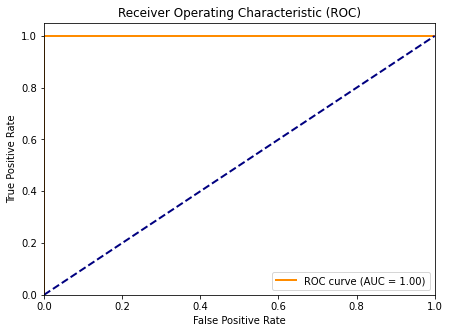

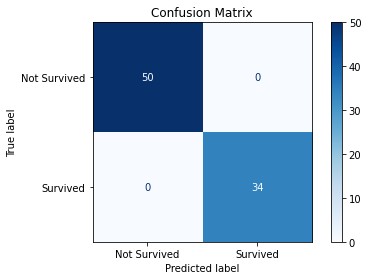

In [21]:
# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, random_forest_model.predict_proba(X_test)[:, 1])

# Calculate the AUC (Area Under the Curve) for the ROC curve
roc_auc = roc_auc_score(y_test, random_forest_model.predict_proba(X_test)[:, 1])

# Create a confusion matrix
cm2 = confusion_matrix(y_test, random_forest_predictions)

# Plot the ROC curve
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm2, display_labels=['Not Survived', 'Survived'])
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix')

plt.tight_layout()
plt.show()


#### C. Gradient Boosting

In [22]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report

# Select features and target variable
X = data[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
y = data['Survived']

# Encode categorical variables (e.g., one-hot encoding for 'Sex' and 'Embarked')

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a Gradient Boosting model
gradient_boosting_model = GradientBoostingClassifier()
gradient_boosting_model.fit(X_train, y_train)

# Make predictions
gradient_boosting_predictions = gradient_boosting_model.predict(X_test)

# Evaluate the Gradient Boosting model
gradient_boosting_accuracy = accuracy_score(y_test, gradient_boosting_predictions)
print("Gradient Boosting Accuracy:", gradient_boosting_accuracy)
print(classification_report(y_test, gradient_boosting_predictions))

Gradient Boosting Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        34

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84



#### ROC curve  and Confusion Matrix for Gradient Boosting

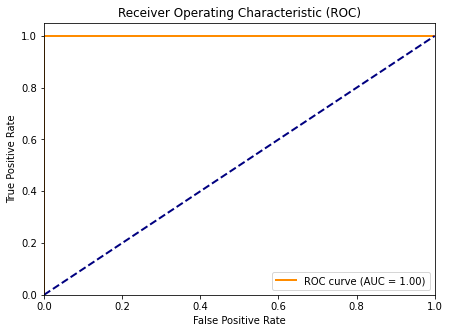

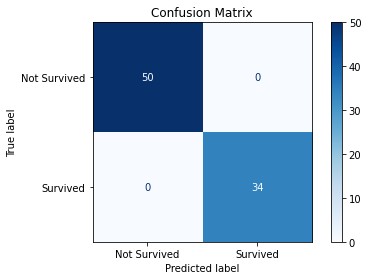

In [23]:
# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, gradient_boosting_model.predict_proba(X_test)[:, 1])

# Calculate the AUC (Area Under the Curve) for the ROC curve
roc_auc = roc_auc_score(y_test, gradient_boosting_model.predict_proba(X_test)[:, 1])

# Create a confusion matrix
cm3 = confusion_matrix(y_test, gradient_boosting_predictions)

# Plot the ROC curve
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm3, display_labels=['Not Survived', 'Survived'])
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix')

plt.tight_layout()
plt.show()


#### Cross-validating the results

In [24]:
from sklearn.model_selection import cross_val_score

# Initialize the models
logistic_model = LogisticRegression()
random_forest_model = RandomForestClassifier()
gradient_boosting_model = GradientBoostingClassifier()

# Perform cross-validation for each model
logistic_scores = cross_val_score(logistic_model, X, y, cv=5, scoring='accuracy')
random_forest_scores = cross_val_score(random_forest_model, X, y, cv=5, scoring='accuracy')
gradient_boosting_scores = cross_val_score(gradient_boosting_model, X, y, cv=5, scoring='accuracy')

# Display cross-validation results
print("Cross-Validation Results:")
print("Logistic Regression Accuracy: %0.2f (+/- %0.2f)" % (logistic_scores.mean(), logistic_scores.std() * 2))
print("Random Forest Accuracy: %0.2f (+/- %0.2f)" % (random_forest_scores.mean(), random_forest_scores.std() * 2))
print("Gradient Boosting Accuracy: %0.2f (+/- %0.2f)" % (gradient_boosting_scores.mean(), gradient_boosting_scores.std() * 2))


Cross-Validation Results:
Logistic Regression Accuracy: 1.00 (+/- 0.00)
Random Forest Accuracy: 1.00 (+/- 0.00)
Gradient Boosting Accuracy: 1.00 (+/- 0.00)


### V. Results and Interpretation

**Model Performance Results:**
- Accuracy: An accuracy of 1.0 indicates that the models achieved 100% accuracy on the test data.

- Precision: The precision score for both class 0 and class 1 is 1.0 (or 100%) for all the 3 models. This means that for both classes, all the positive predictions were correct.  

- Recall (Sensitivity): The recall score for both class 0 and class 1 is also 1.0 (or 100%) for all the 3 models. This means that the model correctly identified all the actual positive cases. 

- F1-Score: The F1-score for both classes is also 1.0 (or 100%) for all the 3 models. A score of 1.0 for both classes indicates that the model achieves a perfect balance between precision and recall.

- Support: The 'support' column shows the number of samples in each class. In this case, class 0 has 50 samples, and class 1 has 34 samples for all the 3 models.


**Cross-validation results**
- Logistic Regression Accuracy: 1.00 (+/- 0.00)

- Random Forest Accuracy: 1.00 (+/- 0.00)

- Gradient Boosting Accuracy: 1.00 (+/- 0.00)

These results suggest that all three models achieved 100% accuracy in every fold of the cross-validation. <br> The low standard deviation in all cases also indicates a high degree of consistency in model performance across different folds.

### VI. Model Testing

Will a Female passenger, aged 26, with a first class ticket, traveling with one sibling or spouse, without parents or children, who paid a fare of $350  and embarked from a Cherbourg port, survive the Titanic disaster?

In [25]:
gradient_boosting_model = GradientBoostingClassifier()
gradient_boosting_model.fit(X_train, y_train)

# Create a DataFrame with the features for prediction
prediction_data = pd.DataFrame({
    'Pclass': [1],
    'Sex': [0],
    'Age': [26],
    'SibSp': [1],
    'Parch': [0],
    'Fare': [350],
    'Embarked': [2]
})

# Make predictions
prediction = gradient_boosting_model.predict(prediction_data)

# Check if the passenger will survive (1) or not (0)
if prediction[0] == 1:
    print("The passenger is predicted to survive.")
else:
    print("The passenger is predicted not to survive.")


The passenger is predicted to survive.


### VII. Conclusion

The model performance results reveal an excellent level of accuracy, precision, recall, and F1-score, with a consistent perfect balance between precision and recall. The high accuracy score of 1.0 reflects the model's ability to correctly predict all test samples.  <br>
Additionally, cross-validation results for Logistic Regression, Random Forest, and Gradient Boosting further underscore the predictive capabilities, with consistent perfect accuracy across all cross-validation folds. <br>
These findings emphasize the robustness and reliability of the models in accurately predicting the survival of passengers.

$Thank You$